In [ ]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# importing all applicable libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import platform
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn import preprocessing, mixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import classification_report
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import itertools
from scipy import linalg



message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Tensorflow version={}".format(tf.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=1.0.2
Numpy version=1.21.6
Pandas version=1.3.5
Matplotlib version=3.2.2
Tensorflow version=2.8.2
Python version=3.7.13


**Importing Dataset**

Prediction task: to predict correctly the category which the image belongs to. Output variable in this case is the category of the image, which is predicted by the model. 

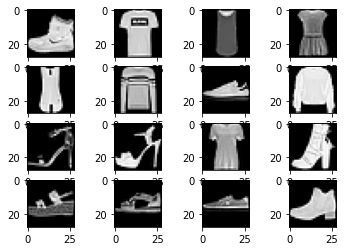

In [ ]:
# Plot mnist instances
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [ ]:
# Identifying the split ratio
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


**Simple Neural Network model building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# flatten 28*28 images to a 784 vector for each image
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

# normalize inputs from 0-255 to 0-1 (min-max scaling)
X_train = X_train / 255
X_test = X_test / 255
print('X_train: ' + str(X_train.shape))
print('X_test:  '  + str(X_test.shape))

X_train: (60000, 784)
X_test:  (10000, 784)


In [ ]:
y_train[:5]


array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
y_train[:5]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)

In [ ]:
# create model
model = Sequential()

# add the first hidden layer
model.add(Dense(784, input_shape=(784,),
                kernel_initializer='normal', activation='relu'))

# add the output layer
model.add(Dense(num_classes,
                kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=30, batch_size=200, verbose=1)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5111 - accuracy: 0.8235 - val_loss: 0.5179 - val_accuracy: 0.8106
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8659 - val_loss: 0.3918 - val_accuracy: 0.8626
Epoch 3/30
300/300 [==============================] - 1s 5ms/step - loss: 0.3345 - accuracy: 0.8795 - val_loss: 0.3863 - val_accuracy: 0.8553
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.3045 - accuracy: 0.8907 - val_loss: 0.3528 - val_accuracy: 0.8711
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.8943 - val_loss: 0.3767 - val_accuracy: 0.8637
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.8986 - val_loss: 0.3346 - val_accuracy: 0.8787
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.2542 - accuracy: 0.9081 - val_loss: 0.3416 - val_accuracy: 0.8746
Epoch 

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 89.64%
Baseline Error: 10.36%


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

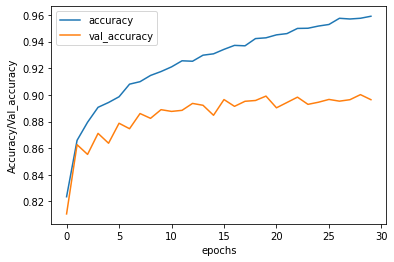

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy/Val_accuracy")
plt.legend()
plt.show()

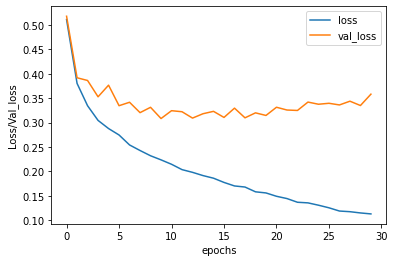

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("Loss/Val_loss")
plt.legend()
plt.show()

**Simple CNN model building**

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K

In [ ]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    print("channels_first")
    # reshape to be [samples][pixels][rows][columns]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    inputShape = (1,28,28)
else:
    print('channels_last')
    # reshape to be [samples][rows][columns][pixels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    inputShape = (28,28,1)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

channels_last


In [ ]:
# Create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
    optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               589952    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=200, verbose=1)


Epoch 1/20
300/300 [==============================] - 2s 6ms/step - loss: 0.5009 - accuracy: 0.8223 - val_loss: 0.3780 - val_accuracy: 0.8669
Epoch 2/20
300/300 [==============================] - 2s 5ms/step - loss: 0.3375 - accuracy: 0.8808 - val_loss: 0.3432 - val_accuracy: 0.8786
Epoch 3/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2995 - accuracy: 0.8928 - val_loss: 0.3393 - val_accuracy: 0.8768
Epoch 4/20
300/300 [==============================] - 2s 6ms/step - loss: 0.2750 - accuracy: 0.8997 - val_loss: 0.2826 - val_accuracy: 0.8977
Epoch 5/20
300/300 [==============================] - 2s 5ms/step - loss: 0.2521 - accuracy: 0.9089 - val_loss: 0.2765 - val_accuracy: 0.8990
Epoch 6/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2356 - accuracy: 0.9140 - val_loss: 0.2669 - val_accuracy: 0.9031
Epoch 7/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2216 - accuracy: 0.9190 - val_loss: 0.2512 - val_accuracy: 0.9090
Epoch 

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Accuracy: 91.75%
CNN Error: 8.25%


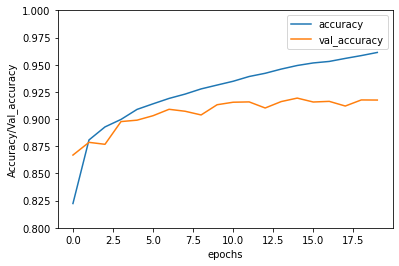

In [ ]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy/Val_accuracy")
plt.legend()
plt.ylim(0.8,1.0)
plt.show()

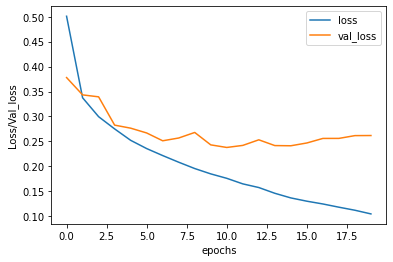

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("Loss/Val_loss")
plt.legend()
plt.show()

In [ ]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    print("channels_first")
    # reshape to be [samples][pixels][rows][columns]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    inputShape = (1,28,28)
else:
    print('channels_last')
    # reshape to be [samples][rows][columns][pixels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    inputShape = (28,28,1)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# # initialize the label names
# labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

channels_last


In [ ]:
# Adding more layers to the CNN model
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
    optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 7, 7, 32)        

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=30, batch_size=200, verbose=1)

Epoch 1/30
300/300 [==============================] - 4s 11ms/step - loss: 0.6891 - accuracy: 0.7444 - val_loss: 0.4266 - val_accuracy: 0.8449
Epoch 2/30
300/300 [==============================] - 3s 10ms/step - loss: 0.4419 - accuracy: 0.8394 - val_loss: 0.3731 - val_accuracy: 0.8667
Epoch 3/30
300/300 [==============================] - 3s 11ms/step - loss: 0.3947 - accuracy: 0.8572 - val_loss: 0.3473 - val_accuracy: 0.8738
Epoch 4/30
300/300 [==============================] - 3s 10ms/step - loss: 0.3653 - accuracy: 0.8675 - val_loss: 0.3195 - val_accuracy: 0.8822
Epoch 5/30
300/300 [==============================] - 3s 10ms/step - loss: 0.3478 - accuracy: 0.8740 - val_loss: 0.3035 - val_accuracy: 0.8892
Epoch 6/30
300/300 [==============================] - 3s 11ms/step - loss: 0.3340 - accuracy: 0.8783 - val_loss: 0.3088 - val_accuracy: 0.8870
Epoch 7/30
300/300 [==============================] - 3s 10ms/step - loss: 0.3244 - accuracy: 0.8804 - val_loss: 0.2875 - val_accuracy: 0.8964

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Accuracy: 92.19%
CNN Error: 7.81%


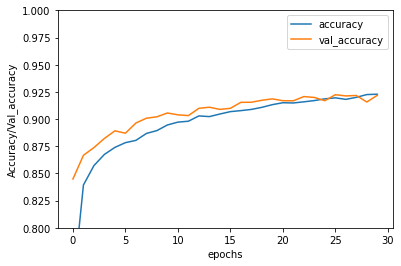

In [ ]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy/Val_accuracy")
plt.legend()
plt.ylim(0.8,1.0)
plt.show()

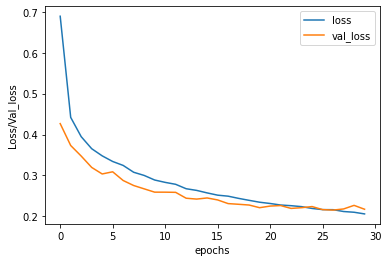

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("Loss/Val_loss")
plt.legend()
plt.show()

**Hyperparameter tuning for CNN**

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.optimizers import *
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Identifying available hyperparameters
estimator = KerasClassifier(build_fn=model)
print(estimator.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


In [ ]:
# Defining hyperparameter values
params={'batch_size':[100, 200], 
        'epochs':[10, 20, 30]
        } ##

new_model = KerasClassifier(build_fn=model)

models = GridSearchCV(estimator = new_model, param_grid=params, cv=3)


In [ ]:
best_model = models.fit(X_train, y_train)
print('Best model :')
print(best_model.best_params_)

INFO:tensorflow:Assets written to: ram:///tmp/tmphpo88s0a/assets


INFO:tensorflow:Assets written to: ram:///tmp/tmphpo88s0a/assets


INFO:tensorflow:Assets written to: ram:///tmp/tmpi52ws0pv/assets


INFO:tensorflow:Assets written to: ram:///tmp/tmpi52ws0pv/assets


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


400/400 [==============================] - 3s 5ms/step - loss: 0.2121 - accuracy: 0.9202
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2101 - accuracy: 0.9235
Epoch 3/10
400/400 [==============================] - 3s 7ms/step - loss: 0.2062 - accuracy: 0.9233
Epoch 4/10
400/400 [==============================] - 3s 9ms/step - loss: 0.2053 - accuracy: 0.9218
Epoch 5/10
400/400 [==============================] - 3s 7ms/step - loss: 0.2031 - accuracy: 0.9225
Epoch 6/10
400/400 [==============================] - 3s 7ms/step - loss: 0.2021 - accuracy: 0.9232
Epoch 7/10
400/400 [==============================] - 4s 9ms/step - loss: 0.1977 - accuracy: 0.9251
Epoch 8/10
400/400 [==============================] - 4s 9ms/step - loss: 0.1989 - accuracy: 0.9247
Epoch 9/10
400/400 [==============================] - 3s 8ms/step - loss: 0.1936 - accuracy: 0.9278
Epoch 10/10
200/200 [==============================] - 1s 5ms/step
INFO:tensorflow:Assets written to: ram:///tm

INFO:tensorflow:Assets written to: ram:///tmp/tmpmwxn0y1y/assets
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/10
400/400 [==============================] - 4s 7ms/step - loss: 0.2147 - accuracy: 0.9186
Epoch 2/10
400/400 [==============================] - 3s 7ms/step - loss: 0.2085 - accuracy: 0.9213
Epoch 3/10
400/400 [==============================] - 3s 9ms/step - loss: 0.2100 - accuracy: 0.9211
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2037 - accuracy: 0.9231
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2018 - accuracy: 0.9247
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2011 - accuracy: 0.9232
Epoch 7/10
400/400 [==============================] - 2s 6ms/step - loss: 0.1948 - accuracy: 0.9269
Epoch 8/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1943 - accuracy: 0.9273
Epoch 9/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1944 - accuracy: 0.9270
Epoch 10/10
200/200 [==============================] - 1s 2ms/step
INFO:tensorflow:Assets written to

INFO:tensorflow:Assets written to: ram:///tmp/tmplhutt5nu/assets


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


400/400 [==============================] - 3s 6ms/step - loss: 0.2158 - accuracy: 0.9197
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 0.2109 - accuracy: 0.9211
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2068 - accuracy: 0.9221
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2016 - accuracy: 0.9250
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2033 - accuracy: 0.9224
Epoch 6/10
400/400 [==============================] - 2s 6ms/step - loss: 0.2033 - accuracy: 0.9226
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1981 - accuracy: 0.9253
Epoch 8/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1932 - accuracy: 0.9269
Epoch 9/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1910 - accuracy: 0.9273
Epoch 10/10
200/200 [==============================] - 1s 3ms/step
INFO:tensorflow:Assets written to: ram:///tm

INFO:tensorflow:Assets written to: ram:///tmp/tmpz5a8wvgl/assets


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


400/400 [==============================] - 3s 5ms/step - loss: 0.2162 - accuracy: 0.9193
Epoch 2/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2098 - accuracy: 0.9225
Epoch 3/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2075 - accuracy: 0.9235
Epoch 4/20
400/400 [==============================] - 2s 6ms/step - loss: 0.2069 - accuracy: 0.9229
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2014 - accuracy: 0.9246
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1996 - accuracy: 0.9247
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1966 - accuracy: 0.9256
Epoch 8/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1941 - accuracy: 0.9271
Epoch 9/20
400/400 [==============================] - 2s 6ms/step - loss: 0.1951 - accuracy: 0.9265
Epoch 10/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1952 - accuracy: 0.9271
Epoch 11/2

INFO:tensorflow:Assets written to: ram:///tmp/tmpatv5sk3w/assets


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


400/400 [==============================] - 3s 6ms/step - loss: 0.2142 - accuracy: 0.9197
Epoch 2/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2106 - accuracy: 0.9216
Epoch 3/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2081 - accuracy: 0.9216
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2053 - accuracy: 0.9234
Epoch 5/20
400/400 [==============================] - 2s 6ms/step - loss: 0.2025 - accuracy: 0.9246
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1961 - accuracy: 0.9245
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1998 - accuracy: 0.9245
Epoch 8/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1949 - accuracy: 0.9265
Epoch 9/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1904 - accuracy: 0.9277
Epoch 10/20
400/400 [==============================] - 3s 6ms/step - loss: 0.1877 - accuracy: 0.9294
Epoch 11/2

INFO:tensorflow:Assets written to: ram:///tmp/tmpg1nhirzh/assets


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


400/400 [==============================] - 3s 5ms/step - loss: 0.2168 - accuracy: 0.9182
Epoch 2/20
400/400 [==============================] - 2s 6ms/step - loss: 0.2067 - accuracy: 0.9220
Epoch 3/20
400/400 [==============================] - 2s 6ms/step - loss: 0.2109 - accuracy: 0.9201
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2063 - accuracy: 0.9228
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2035 - accuracy: 0.9233
Epoch 6/20
400/400 [==============================] - 2s 6ms/step - loss: 0.1982 - accuracy: 0.9258
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1983 - accuracy: 0.9252
Epoch 8/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1967 - accuracy: 0.9244
Epoch 9/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1938 - accuracy: 0.9263
Epoch 10/20
400/400 [==============================] - 2s 5ms/step - loss: 0.1932 - accuracy: 0.9280
Epoch 11/2

INFO:tensorflow:Assets written to: ram:///tmp/tmpwfdfyqlo/assets


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


400/400 [==============================] - 3s 5ms/step - loss: 0.2157 - accuracy: 0.9181
Epoch 2/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2105 - accuracy: 0.9218
Epoch 3/30
400/400 [==============================] - 2s 6ms/step - loss: 0.2068 - accuracy: 0.9230
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2099 - accuracy: 0.9216
Epoch 5/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2031 - accuracy: 0.9248
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1979 - accuracy: 0.9253
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1994 - accuracy: 0.9255
Epoch 8/30
400/400 [==============================] - 2s 6ms/step - loss: 0.1924 - accuracy: 0.9266
Epoch 9/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1942 - accuracy: 0.9273
Epoch 10/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1879 - accuracy: 0.9288
Epoch 11/3

INFO:tensorflow:Assets written to: ram:///tmp/tmpfkgo4lbx/assets


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


400/400 [==============================] - 3s 5ms/step - loss: 0.2140 - accuracy: 0.9194
Epoch 2/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2109 - accuracy: 0.9208
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2076 - accuracy: 0.9215
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2056 - accuracy: 0.9231
Epoch 5/30
400/400 [==============================] - 2s 6ms/step - loss: 0.2032 - accuracy: 0.9233
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2013 - accuracy: 0.9237
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1999 - accuracy: 0.9242
Epoch 8/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1967 - accuracy: 0.9246
Epoch 9/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1935 - accuracy: 0.9267
Epoch 10/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1929 - accuracy: 0.9260
Epoch 11/3

INFO:tensorflow:Assets written to: ram:///tmp/tmpdu3upniw/assets


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


400/400 [==============================] - 2s 5ms/step - loss: 0.2149 - accuracy: 0.9194
Epoch 2/30
400/400 [==============================] - 2s 6ms/step - loss: 0.2085 - accuracy: 0.9220
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2078 - accuracy: 0.9194
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2015 - accuracy: 0.9233
Epoch 5/30
400/400 [==============================] - 2s 5ms/step - loss: 0.2000 - accuracy: 0.9246
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1986 - accuracy: 0.9251
Epoch 7/30
400/400 [==============================] - 2s 6ms/step - loss: 0.2003 - accuracy: 0.9249
Epoch 8/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1933 - accuracy: 0.9269
Epoch 9/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1888 - accuracy: 0.9276
Epoch 10/30
400/400 [==============================] - 2s 5ms/step - loss: 0.1900 - accuracy: 0.9283
Epoch 11/3

INFO:tensorflow:Assets written to: ram:///tmp/tmpa56ph0c7/assets


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 3s 9ms/step - loss: 0.2070 - accuracy: 0.9241
Epoch 2/10
200/200 [==============================] - 2s 9ms/step - loss: 0.2067 - accuracy: 0.9235
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1986 - accuracy: 0.9262
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.1976 - accuracy: 0.9253
Epoch 5/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1932 - accuracy: 0.9279
Epoch 6/10
200/200 [==============================] - 3s 13ms/step - loss: 0.1887 - accuracy: 0.9317
Epoch 7/10
200/200 [==============================] - 3s 17ms/step - loss: 0.1882 - accuracy: 0.9293
Epoch 8/10
200/200 [==============================] - 2s 12ms/step - loss: 0.1857 - accuracy: 0.9301
Epoch 9/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1814 - accuracy: 0.9328
Epoch 10/10
100/100 [==============================] - 0s 4ms/step
INFO:tensorflow:Assets written to: ram:/

INFO:tensorflow:Assets written to: ram:///tmp/tmp2vwg3jqy/assets


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 2s 9ms/step - loss: 0.2064 - accuracy: 0.9220
Epoch 2/10
200/200 [==============================] - 2s 10ms/step - loss: 0.1996 - accuracy: 0.9245
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.2006 - accuracy: 0.9257
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1971 - accuracy: 0.9260
Epoch 5/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1930 - accuracy: 0.9266
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1900 - accuracy: 0.9281
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1886 - accuracy: 0.9289
Epoch 8/10
200/200 [==============================] - 2s 10ms/step - loss: 0.1849 - accuracy: 0.9297
Epoch 9/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1855 - accuracy: 0.9294
Epoch 10/10
100/100 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram:///

INFO:tensorflow:Assets written to: ram:///tmp/tmpj_jt6qes/assets


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 2s 10ms/step - loss: 0.2069 - accuracy: 0.9235
Epoch 2/10
200/200 [==============================] - 2s 10ms/step - loss: 0.2022 - accuracy: 0.9253
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1991 - accuracy: 0.9237
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 0.2000 - accuracy: 0.9262
Epoch 5/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1922 - accuracy: 0.9279
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1868 - accuracy: 0.9298
Epoch 7/10
200/200 [==============================] - 2s 10ms/step - loss: 0.1909 - accuracy: 0.9280
Epoch 8/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1882 - accuracy: 0.9281
Epoch 9/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1871 - accuracy: 0.9298
Epoch 10/10
100/100 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://

INFO:tensorflow:Assets written to: ram:///tmp/tmpwvcril2o/assets


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 3s 10ms/step - loss: 0.2051 - accuracy: 0.9228
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 0.2002 - accuracy: 0.9237
Epoch 3/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1982 - accuracy: 0.9266
Epoch 4/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1925 - accuracy: 0.9272
Epoch 5/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1968 - accuracy: 0.9268
Epoch 6/20
200/200 [==============================] - 2s 10ms/step - loss: 0.1932 - accuracy: 0.9277
Epoch 7/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1902 - accuracy: 0.9281
Epoch 8/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1859 - accuracy: 0.9299
Epoch 9/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1884 - accuracy: 0.9298
Epoch 10/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1830 - accuracy: 0.9314
Epoch 11

INFO:tensorflow:Assets written to: ram:///tmp/tmpy27s2ej2/assets


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 3s 9ms/step - loss: 0.2034 - accuracy: 0.9234
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 0.2001 - accuracy: 0.9255
Epoch 3/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1967 - accuracy: 0.9247
Epoch 4/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1988 - accuracy: 0.9247
Epoch 5/20
200/200 [==============================] - 2s 10ms/step - loss: 0.1912 - accuracy: 0.9285
Epoch 6/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1872 - accuracy: 0.9293
Epoch 7/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1876 - accuracy: 0.9292
Epoch 8/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1886 - accuracy: 0.9296
Epoch 9/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1859 - accuracy: 0.9301
Epoch 10/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1833 - accuracy: 0.9309
Epoch 11/

INFO:tensorflow:Assets written to: ram:///tmp/tmptlspfd6s/assets


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 2s 9ms/step - loss: 0.2063 - accuracy: 0.9225
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1998 - accuracy: 0.9243
Epoch 3/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1972 - accuracy: 0.9263
Epoch 4/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1945 - accuracy: 0.9270
Epoch 5/20
200/200 [==============================] - 2s 10ms/step - loss: 0.1932 - accuracy: 0.9269
Epoch 6/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1897 - accuracy: 0.9282
Epoch 7/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1861 - accuracy: 0.9297
Epoch 8/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1851 - accuracy: 0.9301
Epoch 9/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1860 - accuracy: 0.9290
Epoch 10/20
200/200 [==============================] - 2s 10ms/step - loss: 0.1800 - accuracy: 0.9326
Epoch 11

INFO:tensorflow:Assets written to: ram:///tmp/tmpi_5qdcvt/assets


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 2s 9ms/step - loss: 0.2068 - accuracy: 0.9213
Epoch 2/30
200/200 [==============================] - 2s 9ms/step - loss: 0.2022 - accuracy: 0.9247
Epoch 3/30
200/200 [==============================] - 2s 10ms/step - loss: 0.1990 - accuracy: 0.9266
Epoch 4/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1959 - accuracy: 0.9269
Epoch 5/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1930 - accuracy: 0.9281
Epoch 6/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1885 - accuracy: 0.9298
Epoch 7/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1877 - accuracy: 0.9302
Epoch 8/30
200/200 [==============================] - 2s 10ms/step - loss: 0.1835 - accuracy: 0.9316
Epoch 9/30
200/200 [==============================] - 2s 10ms/step - loss: 0.1860 - accuracy: 0.9311
Epoch 10/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1872 - accuracy: 0.9290
Epoch 1

INFO:tensorflow:Assets written to: ram:///tmp/tmpibd1vtg1/assets


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 3s 10ms/step - loss: 0.2030 - accuracy: 0.9237
Epoch 2/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1999 - accuracy: 0.9259
Epoch 3/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1976 - accuracy: 0.9265
Epoch 4/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1963 - accuracy: 0.9251
Epoch 5/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1963 - accuracy: 0.9269
Epoch 6/30
200/200 [==============================] - 2s 10ms/step - loss: 0.1886 - accuracy: 0.9294
Epoch 7/30
200/200 [==============================] - 2s 10ms/step - loss: 0.1888 - accuracy: 0.9287
Epoch 8/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1853 - accuracy: 0.9306
Epoch 9/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1840 - accuracy: 0.9299
Epoch 10/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1834 - accuracy: 0.9316
Epoch 1

INFO:tensorflow:Assets written to: ram:///tmp/tmpc_p84eom/assets


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


200/200 [==============================] - 2s 9ms/step - loss: 0.2087 - accuracy: 0.9225
Epoch 2/30
200/200 [==============================] - 2s 9ms/step - loss: 0.2022 - accuracy: 0.9258
Epoch 3/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1966 - accuracy: 0.9266
Epoch 4/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1953 - accuracy: 0.9272
Epoch 5/30
200/200 [==============================] - 2s 10ms/step - loss: 0.1897 - accuracy: 0.9291
Epoch 6/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1911 - accuracy: 0.9280
Epoch 7/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1896 - accuracy: 0.9293
Epoch 8/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1860 - accuracy: 0.9296
Epoch 9/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1853 - accuracy: 0.9303
Epoch 10/30
200/200 [==============================] - 2s 10ms/step - loss: 0.1828 - accuracy: 0.9299
Epoch 11

INFO:tensorflow:Assets written to: ram:///tmp/tmphhau0nnc/assets


INFO:tensorflow:Assets written to: ram:///tmp/tmpan4r2qzk/assets


INFO:tensorflow:Assets written to: ram:///tmp/tmpan4r2qzk/assets


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


300/300 [==============================] - 3s 9ms/step - loss: 0.2048 - accuracy: 0.9234
Epoch 2/20
300/300 [==============================] - 3s 10ms/step - loss: 0.2014 - accuracy: 0.9243
Epoch 3/20
300/300 [==============================] - 3s 9ms/step - loss: 0.2001 - accuracy: 0.9257
Epoch 4/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1989 - accuracy: 0.9259
Epoch 5/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1949 - accuracy: 0.9265
Epoch 6/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1926 - accuracy: 0.9280
Epoch 7/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1957 - accuracy: 0.9273
Epoch 8/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1941 - accuracy: 0.9258
Epoch 9/20
300/300 [==============================] - 3s 10ms/step - loss: 0.1897 - accuracy: 0.9293
Epoch 10/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1900 - accuracy: 0.9285
Epoch 11

**Fine-tuning the CNN model**

In [ ]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    print("channels_first")
    # reshape to be [samples][pixels][rows][columns]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    inputShape = (1,28,28)
else:
    print('channels_last')
    # reshape to be [samples][rows][columns][pixels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    inputShape = (28,28,1)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# # initialize the label names
# labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

channels_last


In [ ]:
model = Sequential()
# Add convolution 2D
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
    optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=200, verbose=1)

Epoch 1/20
300/300 [==============================] - 4s 10ms/step - loss: 0.6827 - accuracy: 0.7491 - val_loss: 0.4415 - val_accuracy: 0.8430
Epoch 2/20
300/300 [==============================] - 3s 10ms/step - loss: 0.4467 - accuracy: 0.8392 - val_loss: 0.3690 - val_accuracy: 0.8643
Epoch 3/20
300/300 [==============================] - 3s 10ms/step - loss: 0.3975 - accuracy: 0.8559 - val_loss: 0.3386 - val_accuracy: 0.8801
Epoch 4/20
300/300 [==============================] - 3s 10ms/step - loss: 0.3679 - accuracy: 0.8661 - val_loss: 0.3170 - val_accuracy: 0.8870
Epoch 5/20
300/300 [==============================] - 3s 10ms/step - loss: 0.3457 - accuracy: 0.8733 - val_loss: 0.3024 - val_accuracy: 0.8898
Epoch 6/20
300/300 [==============================] - 3s 10ms/step - loss: 0.3300 - accuracy: 0.8793 - val_loss: 0.2915 - val_accuracy: 0.8940
Epoch 7/20
300/300 [==============================] - 3s 10ms/step - loss: 0.3180 - accuracy: 0.8846 - val_loss: 0.2798 - val_accuracy: 0.8961

**Evaluating results of the model**

1. Accuracy & Error scores

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final model Accuracy: %.2f%%" % (scores[1]*100))
print("Final model Error: %.2f%%" % (100-scores[1]*100))

Final model Accuracy: 91.83%
Final model Error: 8.17%


2. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

y_pred=model.predict(X_test) 
y_pred1=np.argmax(y_pred, axis=1)
y_test1=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test1, y_pred1)

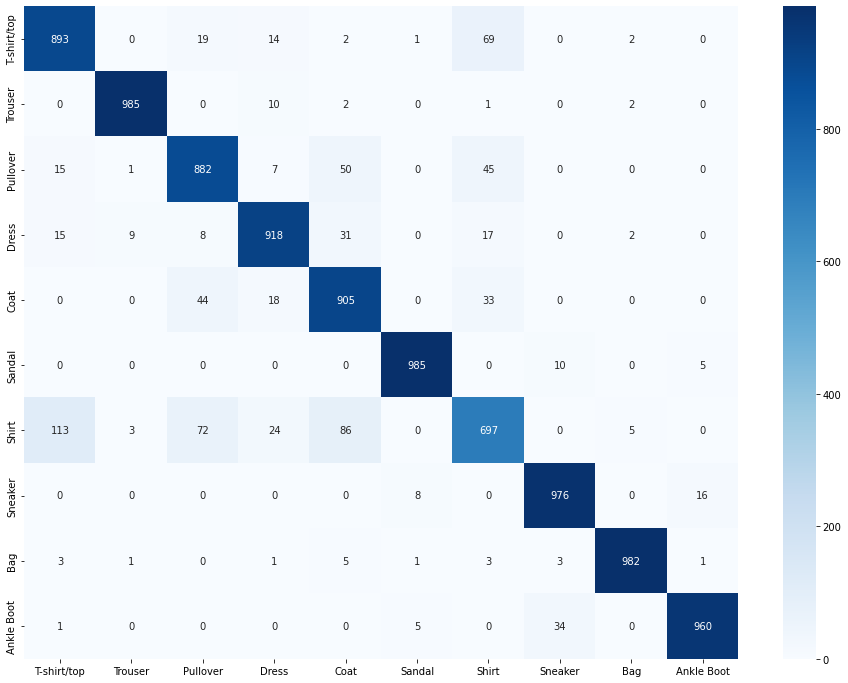

In [ ]:
cf_matrix = pd.DataFrame(cm, index= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"], 
                         columns=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"])

f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

**Making Predictions**

In [ ]:
p = y_pred1
y = y_test1
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [ ]:
print("Correctly predicted classes:",correct.shape[0])
print("Incorrectly predicted classes:",incorrect.shape[0])

Correctly predicted classes: 9183
Incorrectly predicted classes: 817


In [ ]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(num_classes)]
print(classification_report(y_test1, y_pred1, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.86      0.89      0.88      1000
    Class 1 (Trouser) :       0.99      0.98      0.99      1000
   Class 2 (Pullover) :       0.86      0.88      0.87      1000
      Class 3 (Dress) :       0.93      0.92      0.92      1000
       Class 4 (Coat) :       0.84      0.91      0.87      1000
     Class 5 (Sandal) :       0.98      0.98      0.98      1000
      Class 6 (Shirt) :       0.81      0.70      0.75      1000
    Class 7 (Sneaker) :       0.95      0.98      0.96      1000
        Class 8 (Bag) :       0.99      0.98      0.99      1000
 Class 9 (Ankle Boot) :       0.98      0.96      0.97      1000

               accuracy                           0.92     10000
              macro avg       0.92      0.92      0.92     10000
           weighted avg       0.92      0.92      0.92     10000



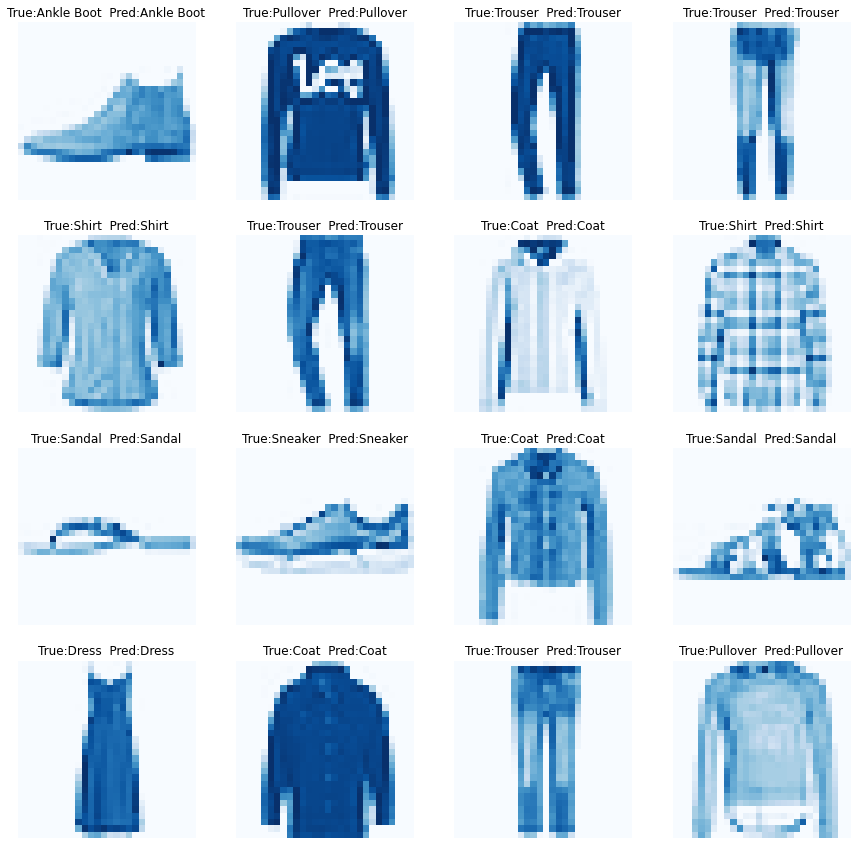

In [ ]:
# Visualization for correctly classified images
def plot_images(x ,cmap="Blues"):
    # Plot the sample images
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(x[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_test1[indx]],labels[y_pred1[indx]]))
    plt.show()   

# Samples of correct images
plot_images(correct, "Blues")

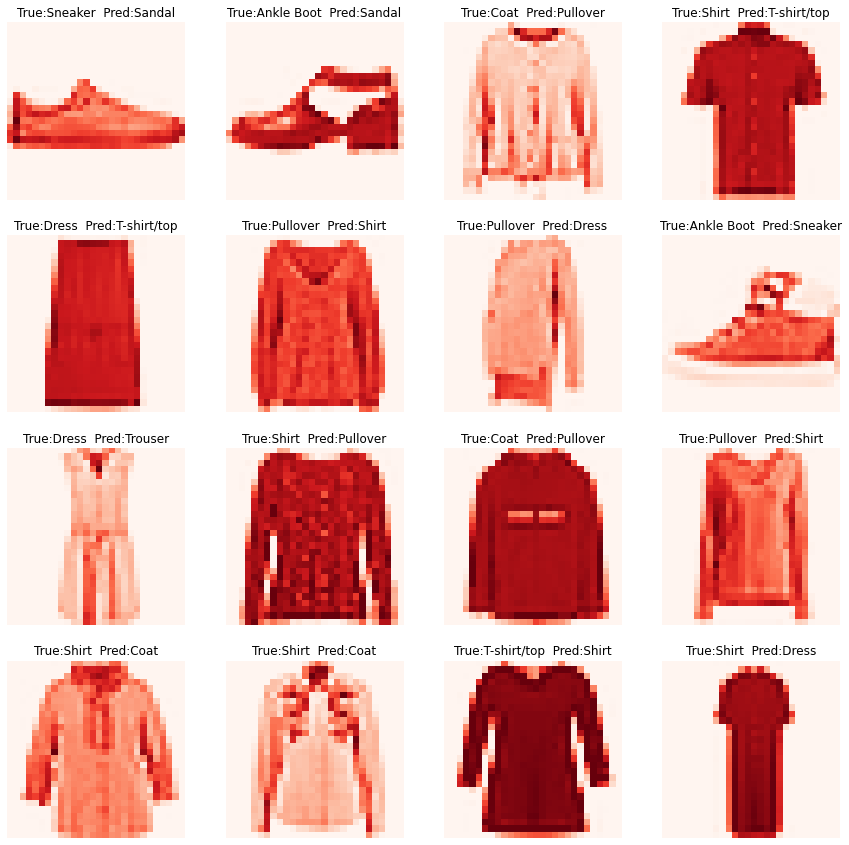

In [ ]:
# Samples of incorrect images
plot_images(incorrect, "Reds")

Conclusion: Most of the images in the shirt category were wrongly classified as either T-shirt/top, pullover or coat. The model had the best accuracy scores in predicting bag, sneaker, trouser, ankle boot and sandal. This may be because these images had more distinct features as opposed to clothes, which are harder to distinguish, since most of the tops of different categories appeared similar in images. 

**References**

1. Julio S. "Hyperparameters Optimization on Fashion MNIST". Retrieved, August 5 2022 from https://www.kaggle.com/code/jserna/hyperparameters-optimization-on-fashion-mnist/notebook

2. Red Hat Developer. "Build, train, and run your TensorFlow model". Retrieved, August 7 2022 from https://developers.redhat.com/learn/openshift-data-science/how-create-tensorflow-model/build-train-run-tensorflow-model

3. Gabriel P. "CNN with Tensorflow|Keras for Fashion MNIST". Retrieved, August 8 2022 from https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist/notebook